# Chapter 3

Example 3.2.1

In a new method for determining selenourea in water the following values were
obtained for tap water samples spiked with 50 ng ml-1 of selenourea:
50.4, 50.7, 49.1, 49.0, 51.1 ng ml-1
(Aller, A.J. and Robles, L.C., 1998 Analyst, 123: 919).
Is there any evidence of systematic error?

In [1]:
import numpy as np
from scipy.stats import t

# Data
data = np.array([50.4, 50.7, 49.1, 49.0, 51.1])

# Sample mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
n = len(data)

# Hypothesized mean
mu = 50

# Calculate the t-statistic
t_statistic = (mean - mu) / (std_dev / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Critical t-value for 95% confidence interval (two-tailed)
t_critical = t.ppf(0.975, df)

# Determine if systematic error is evident
print(f"Sample Mean: {mean:.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Critical t-Value: {t_critical:.2f}")

# Decision
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis: Evidence of systematic error.")
else:
    print("Fail to reject the null hypothesis: No evidence of systematic error.")


Sample Mean: 50.06
t-Statistic: 0.14
Critical t-Value: 2.78
Fail to reject the null hypothesis: No evidence of systematic error.


Example 3.3.1
In a comparison of two methods for the determination of chromium in rye
grass, the following results (mg kg-1 Cr) were obtained:
Method 1: mean = 1.48; standard deviation 0.28
Method 2: mean = 2.33; standard deviation 0.31
For each method 5 determinations were made.
(Sahuquillo, A., Rubio, R., and Rauret, G. 1999, Analyst, 124: 1).
Do these two methods give results with means that differ significantly?

In [2]:
import numpy as np
from scipy.stats import t

# Given data for both methods
mean1, std_dev1, n1 = 1.48, 0.28, 5
mean2, std_dev2, n2 = 2.33, 0.31, 5

# Calculate the t-statistic using Welch's formula
t_statistic = (mean1 - mean2) / np.sqrt((std_dev1**2 / n1) + (std_dev2**2 / n2))

# Calculate the degrees of freedom for Welch's t-test
df = ((std_dev1**2 / n1 + std_dev2**2 / n2)**2 /
      ((std_dev1**2 / n1)**2 / (n1 - 1) + (std_dev2**2 / n2)**2 / (n2 - 1)))

# Calculate the p-value from the t-distribution
p_value = t.sf(np.abs(t_statistic), df) * 2  # Multiply by 2 for two-tailed test

# Print results
print(f"t-Statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two methods.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two methods.")


t-Statistic: -4.5499
Degrees of Freedom: 7.92
p-Value: 0.0019
Reject the null hypothesis: There is a significant difference between the two methods.


Example 3.3.2
In a series of experiments on the determination of tin in foodstuffs, samples
were boiled with hydrochloric acid under reflux for different times. Some of the
results are shown below:
Refluxing time (min) Tin found (mg kg-1)
30
75
55, 57, 59, 56, 56, 59
57, 55, 58, 59, 59, 59
(Analytical Methods Committee, 1983. Analyst, 108: 109).
Does the mean amount of tin found differ significantly for the two boiling times?

In [3]:
import numpy as np
from scipy.stats import t

# Data
data_30min = np.array([55, 57, 59, 56, 56, 59])
data_75min = np.array([57, 55, 58, 59, 59, 59])

# Calculate means and standard deviations
mean_30min = np.mean(data_30min)
mean_75min = np.mean(data_75min)
std_dev_30min = np.std(data_30min, ddof=1)
std_dev_75min = np.std(data_75min, ddof=1)

# Sample sizes
n_30min = len(data_30min)
n_75min = len(data_75min)

# Calculate t-statistic using Welch's formula
numerator = mean_30min - mean_75min
denominator = np.sqrt((std_dev_30min**2 / n_30min) + (std_dev_75min**2 / n_75min))
t_statistic = numerator / denominator

# Degrees of freedom using Welch-Satterthwaite equation
df = ((std_dev_30min**2 / n_30min + std_dev_75min**2 / n_75min)**2 /
      ((std_dev_30min**2 / n_30min)**2 / (n_30min - 1) + (std_dev_75min**2 / n_75min)**2 / (n_75min - 1)))

# Calculate p-value
p_value = t.sf(np.abs(t_statistic), df) * 2  # two-tailed test

# Output results
print(f"t-Statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the mean tin amounts.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean tin amounts.")


t-Statistic: -0.8811
Degrees of Freedom: 9.98
p-Value: 0.3990
Fail to reject the null hypothesis: There is no significant difference in the mean tin amounts.


Example 3.3.3
The data below give the concentration of thiol (mM) in the blood lysate of the
blood of two groups of volunteers, the first group being ‘normal’ and the second
suffering from rheumatoid arthritis:


Normal: 1.84, 1.92, 1.94, 1.92, 1.85, 1.91, 2.07

Rheumatoid: 2.81, 4.06, 3.62, 3.27, 3.27, 3.76

(Banford, J.C., Brown, D.H., McConnell, A.A., McNeil, C.J., Smith, W.E.,
Hazelton, R.A., and Sturrock, R.D. 1982 Analyst, 107: 195)
The null hypothesis adopted is that the mean concentration of thiol is the same
for the two groups.

In [4]:
import numpy as np
from scipy.stats import t

# Data
normal = np.array([1.84, 1.92, 1.94, 1.92, 1.85, 1.91, 2.07])
rheumatoid = np.array([2.81, 4.06, 3.62, 3.27, 3.27, 3.76])

# Calculate means and standard deviations
mean_normal = np.mean(normal)
mean_rheumatoid = np.mean(rheumatoid)
std_dev_normal = np.std(normal, ddof=1)
std_dev_rheumatoid = np.std(rheumatoid, ddof=1)

# Sample sizes
n_normal = len(normal)
n_rheumatoid = len(rheumatoid)

# Calculate t-statistic using Welch's formula
numerator = mean_normal - mean_rheumatoid
denominator = np.sqrt((std_dev_normal**2 / n_normal) + (std_dev_rheumatoid**2 / n_rheumatoid))
t_statistic = numerator / denominator

# Degrees of freedom using Welch-Satterthwaite equation
df = ((std_dev_normal**2 / n_normal + std_dev_rheumatoid**2 / n_rheumatoid)**2 /
      ((std_dev_normal**2 / n_normal)**2 / (n_normal - 1) + (std_dev_rheumatoid**2 / n_rheumatoid)**2 / (n_rheumatoid - 1)))

# Calculate p-value
p_value = t.sf(np.abs(t_statistic), df) * 2  # two-tailed test

# Output results
print(f"Mean (Normal): {mean_normal:.2f}, Mean (Rheumatoid): {mean_rheumatoid:.2f}")
print(f"t-Statistic: {t_statistic:.4f}, Degrees of Freedom: {df:.2f}, p-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the mean thiol concentrations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean thiol concentrations.")


Mean (Normal): 1.92, Mean (Rheumatoid): 3.46
t-Statistic: -8.4772, Degrees of Freedom: 5.25, p-Value: 0.0003
Reject the null hypothesis: There is a significant difference in the mean thiol concentrations.


In [5]:
import pandas as pd

# Create data dictionary
data = {
    "Batch": list(range(1, 11)),
    "UV Spectrometric Assay (mg/kg)": [84.63, 84.38, 84.08, 84.41, 83.82, 83.55, 83.92, 83.69, 84.06, 84.03],
    "Near-infrared Reflectance Spectroscopy (mg/kg)": [83.15, 83.72, 83.84, 84.20, 83.92, 84.16, 84.02, 83.60, 84.13, 84.24]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set Batch as the index
df.set_index('Batch', inplace=True)

# Display DataFrame
df


,UV Spectrometric Assay (mg/kg),Near-infrared Reflectance Spectroscopy (mg/kg)
Batch,,
1,84.63,83.15
2,84.38,83.72
3,84.08,83.84
4,84.41,84.20
5,83.82,83.92
6,83.55,84.16
7,83.92,84.02
8,83.69,83.60
9,84.06,84.13


Example 3.4.1
Test whether there is a significant difference between the results obtained by the
two methods in Table 3.1.

In [6]:
import numpy as np
from scipy.stats import ttest_rel #paired t-test.

# Data for both methods
method1 = np.array([84.63, 84.38, 84.08, 84.41, 83.82, 83.55, 83.92, 83.69, 84.06, 84.03])
method2 = np.array([83.15, 83.72, 83.84, 84.20, 83.92, 84.16, 84.02, 83.60, 84.13, 84.24])

# Calculate differences
differences = method1 - method2

# Perform the paired t-test
t_stat, p_value = ttest_rel(method1, method2)

# Output results
print(f"t-Statistic: {t_stat:.3f}")
print(f"p-Value: {p_value:.4f}")

# Decision making based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the two methods.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two methods.")


t-Statistic: 0.882
p-Value: 0.4007
Fail to reject the null hypothesis: There is no significant difference between the two methods.


Example 3.5.1
It is suspected that an acid-base titrimetric method has a significant indicator
error and thus tends to give results with a positive systematic error (i.e. positive
bias). To test this an exactly 0.1 M solution of acid is used to titrate 25.00 ml of an
exactly 0.1 M solution of alkali, with the following results (ml):
25.06 25.18 24.87 25.51 25.34 25.41
Test for positive bias in these results.

In [7]:
import numpy as np
from scipy.stats import t

# Given data
volumes = np.array([25.06, 25.18, 24.87, 25.51, 25.34, 25.41])
mu = 25.00  # Expected volume

# Calculate the sample mean and standard deviation
sample_mean = np.mean(volumes)
sample_std = np.std(volumes, ddof=1)
n = len(volumes)

# Calculate the t-statistic
t_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Calculate the p-value (for a one-tailed test)
p_value = t.sf(t_stat, df)

# Print results
print(f"Sample Mean: {sample_mean:.4f}")
print(f"t-Statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"p-Value: {p_value:.4f}")

# Decision making
if p_value < 0.05:
    print("Reject the null hypothesis: There is significant evidence of a positive bias.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence of a positive bias.")


Sample Mean: 25.2283
t-Statistic: 2.3473
Degrees of Freedom: 5
p-Value: 0.0329
Reject the null hypothesis: There is significant evidence of a positive bias.



Example 3.6.1
A proposed method for the determination of the chemical oxygen demand of
wastewater was compared with the standard (mercury salt) method. The following
results were obtained for a sewage effluent sample:


Mean (mg l-1) --------------Standard deviation (mg l-1)


Standard method 72 ----------3.31


Proposed method 72 -------------1.51


For each method eight determinations were made.
(Ballinger, D., Lloyd, A., and Morrish, A., 1982, Analyst, 107: 1047)
Is the precision of the proposed method significantly greater than that of the
standard method?

In [8]:
from scipy.stats import f

# Variances (squared standard deviations)
var_standard = 3.31**2
var_proposed = 1.51**2

# Sample sizes
n_standard = 8
n_proposed = 8

# Calculate the F-statistic
F_stat = var_standard / var_proposed

# Degrees of freedom
df1 = n_standard - 1  # DF for the standard method
df2 = n_proposed - 1  # DF for the proposed method

# Calculate the p-value for a one-tailed test (right tail)
p_value = f.sf(F_stat, df1, df2)  # Survival function (1-CDF)

# Print results
print(f"F-statistic: {F_stat:.4f}")
print(f"Degrees of Freedom: df1={df1}, df2={df2}")
print(f"p-Value: {p_value:.4f}")

# Decision making
if p_value < 0.05:
    print("Reject the null hypothesis: The precision of the proposed method is significantly greater.")
else:
    print("Fail to reject the null hypothesis: The precision of the proposed method is not significantly greater.")


F-statistic: 4.8051
Degrees of Freedom: df1=7, df2=7
p-Value: 0.0276
Reject the null hypothesis: The precision of the proposed method is significantly greater.


Example 3.6.2
In Example 3.3.1 it was assumed that the variances of the two methods for
determining chromium in rye grass did not differ significantly. This assumption
can now be tested. The standard deviations were 0.28 and 0.31 (each
obtained from five measurements on a specimen of a particular plant).

In [9]:
from scipy.stats import f

# Standard deviations
s1 = 0.28
s2 = 0.31

# Calculate variances
var1 = s1**2
var2 = s2**2

# Number of measurements
n = 5

# F-statistic
F_stat = max(var1, var2) / min(var1, var2)

# Degrees of freedom
df1 = n - 1
df2 = n - 1

# P-value for the F-test (two-tailed)
p_value = 2 * min(f.cdf(F_stat, df1, df2), 1 - f.cdf(F_stat, df1, df2))

# Output results
print(f"F-statistic: {F_stat:.4f}")
print(f"Degrees of Freedom: df1={df1}, df2={df2}")
print(f"p-Value: {p_value:.4f}")

# Decision based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in variances.")


F-statistic: 1.2258
Degrees of Freedom: df1=4, df2=4
p-Value: 0.8484
Fail to reject the null hypothesis: There is no significant difference in variances.


Example 3.7.1
The following values were obtained for the nitrite concentration (mg l-1) in a
sample of river water:
0.403, 0.410, 0.401, 0.380
The last measurement is noticeably lower than the others and is thus suspect:
should it be rejected?

In [10]:
import numpy as np

# Data
data = np.array([0.403, 0.410, 0.401, 0.380])

# Sort data to facilitate calculations
sorted_data = np.sort(data)

# Calculate Q
range_of_data = sorted_data[-1] - sorted_data[0]
gap = sorted_data[-1] - sorted_data[-2]  # If suspecting the highest value
Q = gap / range_of_data

# Critical Q value for n=4 at 90% confidence level (commonly used)
Q_critical = 0.765  # This value can be found in statistical tables for Dixon's Q test

# Output results
print(f"Calculated Q: {Q:.3f}")
print(f"Critical Q: {Q_critical}")

# Decision
if Q > Q_critical:
    print("Reject the suspected value as an outlier.")
else:
    print("Do not reject the suspected value as an outlier.")


Calculated Q: 0.233
Critical Q: 0.765
Do not reject the suspected value as an outlier.


In [11]:
import numpy as np
from scipy.stats import t

# Given data
data = np.array([0.403, 0.410, 0.401, 0.380])

# Calculate mean and standard deviation
mean_data = np.mean(data)
std_dev_data = np.std(data, ddof=1)

# Calculate the Grubbs' statistic
max_deviation = np.max(np.abs(data - mean_data))
G = max_deviation / std_dev_data

# Degrees of freedom
n = len(data)

# Critical value from the t-distribution
t_value = t.ppf(1 - 0.05 / (2 * n), n - 2)  # Two-tailed test and alpha adjusted for 2 tails
G_critical = (n - 1) / np.sqrt(n) * np.sqrt(t_value**2 / (n - 2 + t_value**2))

# Output results
print(f"Grubbs' Statistic: {G:.3f}")
print(f"Critical Value for G: {G_critical:.3f}")

# Decision
if G > G_critical:
    print("Reject the null hypothesis: The suspected value is an outlier.")
else:
    print("Fail to reject the null hypothesis: There is no significant outlier.")


Grubbs' Statistic: 1.432
Critical Value for G: 1.481
Fail to reject the null hypothesis: There is no significant outlier.


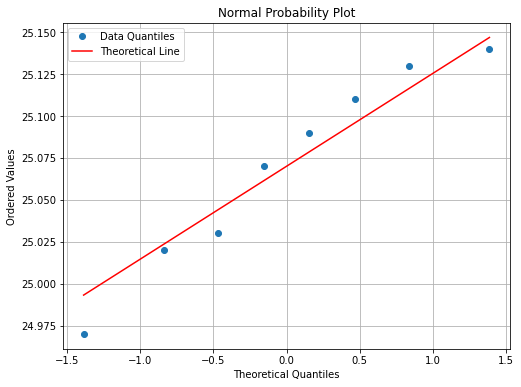

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Given data
data = np.array([25.13, 25.02, 25.11, 25.07, 25.03, 24.97, 25.14, 25.09])

# Sort the data
data_sorted = np.sort(data)

# Generate theoretical quantiles
norm_quantiles = stats.probplot(data_sorted, dist="norm", plot=None)[0][0]

# Plotting the quantiles of the data against the theoretical quantiles
plt.figure(figsize=(8, 6))
plt.plot(norm_quantiles, data_sorted, 'o', label='Data Quantiles')
plt.plot(norm_quantiles, norm_quantiles * np.std(data_sorted) + np.mean(data_sorted), 'r-', label='Theoretical Line')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Normal Probability Plot')
plt.legend()
plt.grid(True)
plt.show()


# Kolmogorov-Smirnov test

KS Statistic: 0.14082612082605328
p-value: 0.9898474554176184


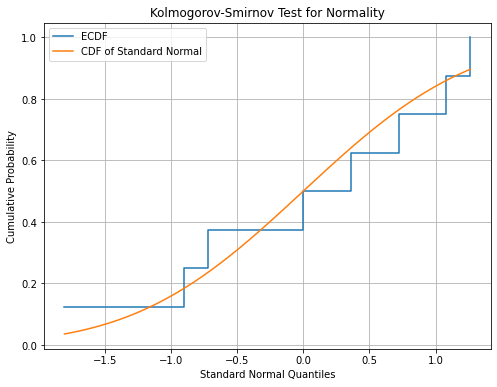

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

# Sample data
# data = np.array([109, 89, 99, 99, 107, 111, 86, 74, 115, 107, 134, 113, 110, 88, 104])
data = np.array([25.13, 25.02, 25.11, 25.07, 25.03, 24.97, 25.14, 25.09])

# Standardize the data
data_mean = np.mean(data)
data_std = np.std(data)
data_z = (data - data_mean) / data_std

# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = kstest(data_z, 'norm')

# Output results
print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {p_value}")

# Plotting ECDF and CDF
# Calculate ECDF
sorted_data = np.sort(data_z)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Generate points on the CDF for the standard normal distribution
cdf_x = np.linspace(min(sorted_data), max(sorted_data), 1000)
cdf_y = norm.cdf(cdf_x)

# Plot both ECDF and CDF
plt.figure(figsize=(8, 6))
plt.step(sorted_data, ecdf, label='ECDF', where='post')
plt.plot(cdf_x, cdf_y, label='CDF of Standard Normal')
plt.title('Kolmogorov-Smirnov Test for Normality')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()
